In [2]:
print(context)

In [3]:
%reload_kedro

2019-11-13 23:23:33,132 - root - INFO - ** Kedro project sneakairs
2019-11-13 23:23:33,134 - root - INFO - Defined global variable context


In [4]:
df = context.io.load('kof_processed')

2019-11-13 23:23:33,298 - kedro.io.data_catalog - INFO - Loading data from `kof_processed` (CSVLocalDataSet)...


In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from kedro.io import *
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [6]:
df['Date'] = pd.to_datetime(df.Date)

In [7]:
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month)
df['week'] = df['Date'].apply(lambda x: x.week)
df['day'] = df['Date'].apply(lambda x: x.day)

In [8]:
def day_id(x):
    if x == 'Sunday':
        return 0
    if x == 'Monday':
        return 1
    if x == 'Tuesday':
        return 2
    if x == 'Wednesday':
        return 3
    if x == 'Thursday':
        return 4
    if x == 'Friday':
        return 5
    if x == 'Saturday':
        return 6

In [9]:
df['month_name'] = df['Date'].apply(lambda x: x.month_name())
df['day_name'] = df['Date'].apply(lambda x: x.day_name())
df['day_id'] = df['day_name'].apply(lambda x: day_id(x))

In [10]:
df = df[df['Brand']=='Nike']
df = df.reset_index(drop=True)

In [11]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Code_Style,Name,Brand,Date,Retail_Price,Colorway,Story,KOF_Wants,Avg_Resale,Net_Profit,Purchase,Brand_Code,Color_Code,Womens,bCollab,OG,SP,QS,SB,LS,NRG,PRM,NSW,RETRO,SE,PE,GS,HS,year,month,week,day,month_name,day_name,day_id
0,0,0,314996-101,Nike Air Foamposite One Snakeskin,Nike,2019-04-15,220,Sail/Black-Habanero Red-Black,"Equipped with an eye-catching upper, this Air ...",2281,305,49.545275,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,16,15,April,Monday,1


### Nike over time

In [12]:
df = df.set_index('Date')

In [13]:
nike = df.groupby([(df.index.year),(df.index.month)])['Name'].count()

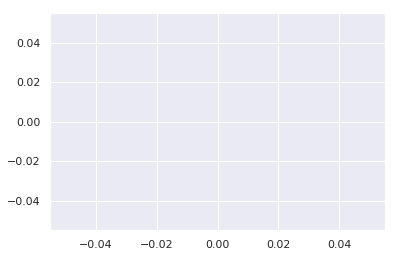

In [14]:
sns.lineplot(data=nike)